In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [3]:
train_data = pd.read_csv('/content/drive/MyDrive/Train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Test.csv')
submission_data = pd.read_csv('/content/drive/MyDrive/Submission.csv')

In [4]:
print("Train Data Head:\n", train_data.head())
print("Test Data Head:\n", test_data.head())

Train Data Head:
    Holiday  Temperature  Rainfall_last_hour  Snowfall_last_hour  Cloud_Cover  \
0      NaN       289.28                 0.0                 0.0           40   
1      NaN       290.26                 0.0                 0.0           75   
2      NaN       290.28                 0.0                 0.0           90   
3      NaN       290.33                 0.0                 0.0           90   
4      NaN       292.14                 0.0                 0.0           75   

        Weather         Weather_Desc       TimeStamp      Date  Traffic_Vol  
0  Cloudy skies  Partly cloudy skies   02/10/08 9:00  02/10/08         5555  
1  Cloudy skies    Fragmented clouds  02/10/08 10:00  02/10/08         4525  
2  Cloudy skies     Full cloud cover  02/10/08 11:00  02/10/08         4772  
3  Cloudy skies     Full cloud cover  02/10/08 12:00  02/10/08         5031  
4  Cloudy skies    Fragmented clouds  02/10/08 13:00  02/10/08         4928  
Test Data Head:
    Holiday  Temp

In [5]:
if 'date_time' in train_data.columns:
    train_data['date_time'] = pd.to_datetime(train_data['date_time'], errors='coerce')
    test_data['date_time'] = pd.to_datetime(test_data['date_time'], errors='coerce')

    for df in [train_data, test_data]:
        df['hour'] = df['date_time'].dt.hour
        df['day'] = df['date_time'].dt.day
        df['month'] = df['date_time'].dt.month
        df['year'] = df['date_time'].dt.year
        df['weekday'] = df['date_time'].dt.weekday

    train_data.drop(columns=['date_time'], inplace=True)
    test_data.drop(columns=['date_time'], inplace=True)

print("Train Data after date_time processing:\n", train_data.head())
print("Test Data after date_time processing:\n", test_data.head())


Train Data after date_time processing:
    Holiday  Temperature  Rainfall_last_hour  Snowfall_last_hour  Cloud_Cover  \
0      NaN       289.28                 0.0                 0.0           40   
1      NaN       290.26                 0.0                 0.0           75   
2      NaN       290.28                 0.0                 0.0           90   
3      NaN       290.33                 0.0                 0.0           90   
4      NaN       292.14                 0.0                 0.0           75   

        Weather         Weather_Desc       TimeStamp      Date  Traffic_Vol  
0  Cloudy skies  Partly cloudy skies   02/10/08 9:00  02/10/08         5555  
1  Cloudy skies    Fragmented clouds  02/10/08 10:00  02/10/08         4525  
2  Cloudy skies     Full cloud cover  02/10/08 11:00  02/10/08         4772  
3  Cloudy skies     Full cloud cover  02/10/08 12:00  02/10/08         5031  
4  Cloudy skies    Fragmented clouds  02/10/08 13:00  02/10/08         4928  
Test Data a

In [6]:
train_data.fillna(-1, inplace=True)
test_data.fillna(-1, inplace=True)

print("Train Data after filling missing values:\n", train_data.head())
print("Test Data after filling missing values:\n", test_data.head())

Train Data after filling missing values:
    Holiday  Temperature  Rainfall_last_hour  Snowfall_last_hour  Cloud_Cover  \
0     -1.0       289.28                 0.0                 0.0           40   
1     -1.0       290.26                 0.0                 0.0           75   
2     -1.0       290.28                 0.0                 0.0           90   
3     -1.0       290.33                 0.0                 0.0           90   
4     -1.0       292.14                 0.0                 0.0           75   

        Weather         Weather_Desc       TimeStamp      Date  Traffic_Vol  
0  Cloudy skies  Partly cloudy skies   02/10/08 9:00  02/10/08         5555  
1  Cloudy skies    Fragmented clouds  02/10/08 10:00  02/10/08         4525  
2  Cloudy skies     Full cloud cover  02/10/08 11:00  02/10/08         4772  
3  Cloudy skies     Full cloud cover  02/10/08 12:00  02/10/08         5031  
4  Cloudy skies    Fragmented clouds  02/10/08 13:00  02/10/08         4928  
Test Data

In [7]:
label_encoders = {}
for col in train_data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col].astype(str))
    test_data[col] = test_data[col].astype(str).map(lambda s: le.classes_.tolist().index(s) if s in le.classes_ else -1).fillna(-1).astype(int)
    label_encoders[col] = le

print("Train Data after encoding:\n", train_data.head())
print("Test Data after encoding:\n", test_data.head())


Train Data after encoding:
    Holiday  Temperature  Rainfall_last_hour  Snowfall_last_hour  Cloud_Cover  \
0     -1.0       289.28                 0.0                 0.0           40   
1     -1.0       290.26                 0.0                 0.0           75   
2     -1.0       290.28                 0.0                 0.0           90   
3     -1.0       290.33                 0.0                 0.0           90   
4     -1.0       292.14                 0.0                 0.0           75   

   Weather  Weather_Desc  TimeStamp  Date  Traffic_Vol  
0        3            19       2162    99         5555  
1        3             9       2148    99         4525  
2        3            10       2149    99         4772  
3        3            10       2150    99         5031  
4        3             9       2151    99         4928  
Test Data after encoding:
    Holiday  Temperature  Rainfall_last_hour  Snowfall_last_hour  Cloud_Cover  \
0     -1.0       297.65                 0.

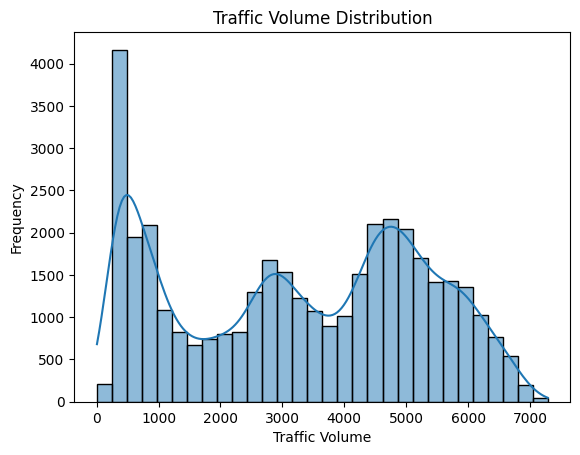

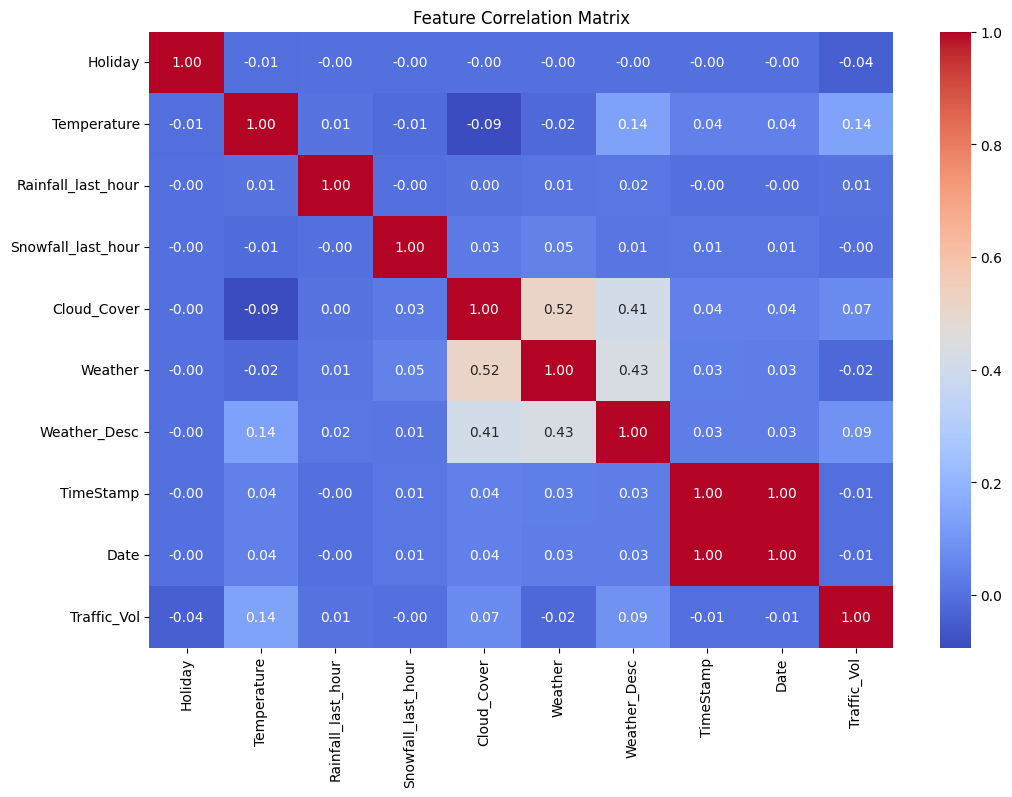

In [8]:
sns.histplot(train_data['Traffic_Vol'], kde=True, bins=30)
plt.title("Traffic Volume Distribution")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.show()

correlation_matrix = train_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()

In [9]:
X = train_data.drop(columns=['Traffic_Vol'])
y = train_data['Traffic_Vol']

X = X.select_dtypes(include=[np.number])
test_data = test_data.select_dtypes(include=[np.number])

missing_cols = set(X.columns) - set(test_data.columns)
for col in missing_cols:
    test_data[col] = 0

test_data = test_data[X.columns]

print("Final Train Features:\n", X.head())
print("Final Test Features:\n", test_data.head())

Final Train Features:
    Holiday  Temperature  Rainfall_last_hour  Snowfall_last_hour  Cloud_Cover  \
0     -1.0       289.28                 0.0                 0.0           40   
1     -1.0       290.26                 0.0                 0.0           75   
2     -1.0       290.28                 0.0                 0.0           90   
3     -1.0       290.33                 0.0                 0.0           90   
4     -1.0       292.14                 0.0                 0.0           75   

   Weather  Weather_Desc  TimeStamp  Date  
0        3            19       2162    99  
1        3             9       2148    99  
2        3            10       2149    99  
3        3            10       2150    99  
4        3             9       2151    99  
Final Test Features:
    Holiday  Temperature  Rainfall_last_hour  Snowfall_last_hour  Cloud_Cover  \
0     -1.0       297.65                 0.0                   0            1   
1     -1.0       297.45                 0.0       

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)

Training set shape: (30698, 9) (30698,)
Validation set shape: (7675, 9) (7675,)


In [11]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("Model trained successfully!")

Model trained successfully!


Validation RMSE: 1653.3826142952903


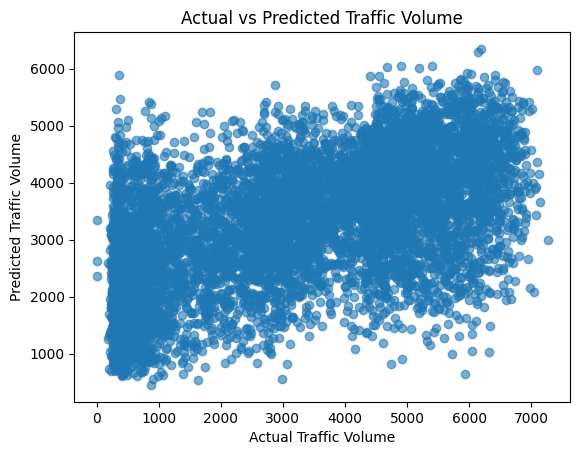

In [12]:
val_predictions = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
print("Validation RMSE:", rmse)
plt.scatter(y_val, val_predictions, alpha=0.6)
plt.title("Actual vs Predicted Traffic Volume")
plt.xlabel("Actual Traffic Volume")
plt.ylabel("Predicted Traffic Volume")
plt.show()

In [13]:
test_predictions = model.predict(test_data)
print("Test Predictions:\n", test_predictions)

Test Predictions:
 [4646.65 4524.31 3548.17 ... 3082.17 3243.93 3259.6 ]


In [14]:
submission_data['Traffic_Vol'] = test_predictions
submission_data.to_csv('updated_submission.csv', index=False)
print("Submission file saved as 'updated_submission.csv'")

Submission file saved as 'updated_submission.csv'


In [15]:
new_submission = pd.read_csv('updated_submission.csv')
print(new_submission)

      Traffic_Vol
0         4646.65
1         4524.31
2         3548.17
3         3609.27
4         3709.48
...           ...
2203      3272.06
2204      3239.17
2205      3082.17
2206      3243.93
2207      3259.60

[2208 rows x 1 columns]
